In [1]:
#寫完後檢查next_batch和read的格式
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

# 指定Google Drive云端硬盘的根目录，名为drive
!mkdir -p drive
!google-drive-ocamlfuse drive

E: Package 'python-software-properties' has no installation candidate
··········
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [1]:
import keras
from keras.models import Model
from keras.layers import Dense, Activation, Lambda, Conv2D, Input, BatchNormalization, MaxPooling2D, Flatten
from keras import regularizers
import keras.backend as K
from keras.utils.vis_utils import plot_model
import os
import cv2
from tqdm import tqdm_notebook
import math
import numpy as np
from os import listdir
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
input_size = 280*80
input_x = 280
input_y = 80
output_size = 99
max_file = 30000

In [3]:
def ct(*x):
    y_true, y_pred = x
    return K.categorical_crossentropy(y_true, y_pred)
def ct(y_true, y_pred):
    return K.categorical_crossentropy(y_true, y_pred)
def read():
    if os.path.isdir('cloth2'):
        os.chdir('cloth2')
    img_list = []
    label_list = []
    now_file = 0
    for file in tqdm_notebook(listdir(os.getcwd()), desc='file', leave=True):
        if os.path.isfile(file) and not file.count('original') and now_file < max_file:
            now_file += 1
            img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (input_x, input_y), interpolation=cv2.INTER_CUBIC)
            img = np.reshape(img, [input_x, input_y, 1])
            img_list.append(img)
            name = ''
            for i in file:
                if i!='_':
                    name += i
                else:
                    break
            label = np.zeros(output_size);
            index = 0
#             print("name:{}".format(name))
            if name.count('-'):
                for i in name:
                    if i != '-':
                        label[index * 11 + int(i)] = 1
                        index += 1
                label = np.reshape(label, [9,11])
                label_list.append(label)
            else:
                index = 2
                label[0*11 + 10] = 1
                label[1*11 + 10] = 1
                for i in name:
                    label[index * 11 + int(i)] = 1
                    index += 1
                label = np.reshape(label, [9,11])
                label_list.append(label)
    label_list_keras_inp = [[],[],[],[],[],[],[],[],[]]
    for i in range(len(label_list)):
        label_list_keras_inp[0].append(label_list[i][0])
        label_list_keras_inp[1].append(label_list[i][1])
        label_list_keras_inp[2].append(label_list[i][2])
        label_list_keras_inp[3].append(label_list[i][3])
        label_list_keras_inp[4].append(label_list[i][4])
        label_list_keras_inp[5].append(label_list[i][5])
        label_list_keras_inp[6].append(label_list[i][6])
        label_list_keras_inp[7].append(label_list[i][7])
        label_list_keras_inp[8].append(label_list[i][8])
    global library
    img_list = np.array(img_list)
    label_list = np.array(label_list)
    label_list_keras_inp = np.array(label_list_keras_inp)
    library = (img_list, label_list_keras_inp)
    print("train_size:{}".format(len(img_list)))
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

In [4]:
library = ([],[])
read()


train_size:9000


In [5]:
input_tensor = Input([input_x, input_y, 1])

W0730 11:40:14.916209 140608972744448 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0730 11:40:14.925397 140608972744448 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [6]:
#CN
x = BatchNormalization()(input_tensor)
x = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu')(x)
x = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu')(x)
x = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu')(x)
x = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)

x = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu')(x)
x = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu')(x)
x = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu')(x)
x = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)

x = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu')(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu')(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu')(x)
x = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)

# x = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu')(x)
# x = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu')(x)
# x = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu')(x)
# x = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)

x = Flatten()(x)

x = Dense(units = 128, activation = 'relu', kernel_initializer = 'normal', kernel_regularizer=regularizers.l1(0.001))(x)
keras.layers.Dropout(0.5)(x)
x = Dense(units = 128, activation = 'relu', kernel_initializer = 'normal', kernel_regularizer=regularizers.l1(0.001))(x)

dig1 = Dense(units = 11, activation = 'softmax', kernel_initializer = 'normal', name = 'dig1')(x)
dig2 = Dense(units = 11, activation = 'softmax', kernel_initializer = 'normal', name = 'dig2')(x)
dig3 = Dense(units = 11, activation = 'softmax', kernel_initializer = 'normal', name = 'dig3')(x)
dig4 = Dense(units = 11, activation = 'softmax', kernel_initializer = 'normal', name = 'dig4')(x)
dig5 = Dense(units = 11, activation = 'softmax', kernel_initializer = 'normal', name = 'dig5')(x)
dig6 = Dense(units = 11, activation = 'softmax', kernel_initializer = 'normal', name = 'dig6')(x)
dig7 = Dense(units = 11, activation = 'softmax', kernel_initializer = 'normal', name = 'dig7')(x)
dig8 = Dense(units = 11, activation = 'softmax', kernel_initializer = 'normal', name = 'dig8')(x)
dig9 = Dense(units = 11, activation = 'softmax', kernel_initializer = 'normal', name = 'dig9')(x)


W0730 11:40:14.966275 140608972744448 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0730 11:40:14.967111 140608972744448 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0730 11:40:14.967732 140608972744448 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0730 11:40:28.260132 140608972744448 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0730 11:40:28.323061 140608972

In [7]:
model = Model(input = [input_tensor], output = [dig1, dig2, dig3, dig4, dig5, dig6, dig7, dig8, dig9,])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  """Entry point for launching an IPython kernel.


In [8]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',  metrics=['accuracy'])
data = []

earlystop = keras.callbacks.EarlyStopping(monitor='val_dig9_acc', patience=5, verbose=1)

data.append(library[0])
data.append(library[1][0])
data.append(library[1][1])
data.append(library[1][2])
data.append(library[1][3])
data.append(library[1][4])
data.append(library[1][5])
data.append(library[1][6])
data.append(library[1][7])
data.append(library[1][8])
x_train = []
for i in data:
    x_train.append(data[0:0])
print(data[1].shape)
train_model = model.fit(data[0], data[1:10], batch_size = 128, epochs = 40, validation_split = 0.2, shuffle = True)

W0730 11:40:28.479575 140608972744448 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



(9000, 11)


W0730 11:40:28.932760 140608972744448 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7200 samples, validate on 1800 samples
Epoch 1/40
7200/7200 [==============================] - 60s 8ms/step - loss: 80.3303 - dig1_loss: 1.6693 - dig2_loss: 1.6671 - dig3_loss: 2.3398 - dig4_loss: 2.3410 - dig5_loss: 2.3219 - dig6_loss: 2.3356 - dig7_loss: 2.3400 - dig8_loss: 2.3274 - dig9_loss: 2.3403 - dig1_acc: 0.4804 - dig2_acc: 0.4817 - dig3_acc: 0.1029 - dig4_acc: 0.1108 - dig5_acc: 0.1154 - dig6_acc: 0.1062 - dig7_acc: 0.1071 - dig8_acc: 0.1013 - dig9_acc: 0.1121 - val_loss: 41.0257 - val_dig1_loss: 1.1913 - val_dig2_loss: 1.2008 - val_dig3_loss: 2.3735 - val_dig4_loss: 2.2076 - val_dig5_loss: 2.1803 - val_dig6_loss: 2.2587 - val_dig7_loss: 2.2860 - val_dig8_loss: 2.2742 - val_dig9_loss: 2.3005 - val_dig1_acc: 0.5717 - val_dig2_acc: 0.5367 - val_dig3_acc: 0.1050 - val_dig4_acc: 0.1800 - val_dig5_acc: 0.1917 - val_dig6_acc: 0.1550 - val_dig7_acc: 0.1400 - val_dig8_acc: 0.1428 - val_dig9_acc: 0.1372
Epoch 2/40
7200/7200 [==============================] - 10s 1ms/step - lo

7200/7200 [==============================] - 10s 1ms/step - loss: 3.8085 - dig1_loss: 0.0843 - dig2_loss: 0.0970 - dig3_loss: 0.0870 - dig4_loss: 0.1066 - dig5_loss: 0.1227 - dig6_loss: 0.0830 - dig7_loss: 0.0977 - dig8_loss: 0.0960 - dig9_loss: 0.1063 - dig1_acc: 0.9710 - dig2_acc: 0.9654 - dig3_acc: 0.9674 - dig4_acc: 0.9617 - dig5_acc: 0.9561 - dig6_acc: 0.9696 - dig7_acc: 0.9667 - dig8_acc: 0.9676 - dig9_acc: 0.9643 - val_loss: 4.6316 - val_dig1_loss: 0.1643 - val_dig2_loss: 0.2205 - val_dig3_loss: 0.1374 - val_dig4_loss: 0.2762 - val_dig5_loss: 0.2868 - val_dig6_loss: 0.1413 - val_dig7_loss: 0.1962 - val_dig8_loss: 0.1453 - val_dig9_loss: 0.1975 - val_dig1_acc: 0.9511 - val_dig2_acc: 0.9339 - val_dig3_acc: 0.9544 - val_dig4_acc: 0.9128 - val_dig5_acc: 0.9172 - val_dig6_acc: 0.9556 - val_dig7_acc: 0.9406 - val_dig8_acc: 0.9494 - val_dig9_acc: 0.9239
Epoch 11/40
7200/7200 [==============================] - 10s 1ms/step - loss: 3.4676 - dig1_loss: 0.0586 - dig2_loss: 0.0741 - dig3_lo

7200/7200 [==============================] - 10s 1ms/step - loss: 2.5417 - dig1_loss: 0.0337 - dig2_loss: 0.0343 - dig3_loss: 0.0418 - dig4_loss: 0.0347 - dig5_loss: 0.0467 - dig6_loss: 0.0458 - dig7_loss: 0.0698 - dig8_loss: 0.0280 - dig9_loss: 0.0489 - dig1_acc: 0.9875 - dig2_acc: 0.9874 - dig3_acc: 0.9858 - dig4_acc: 0.9876 - dig5_acc: 0.9829 - dig6_acc: 0.9840 - dig7_acc: 0.9756 - dig8_acc: 0.9915 - dig9_acc: 0.9819 - val_loss: 3.2494 - val_dig1_loss: 0.1021 - val_dig2_loss: 0.1645 - val_dig3_loss: 0.0993 - val_dig4_loss: 0.0867 - val_dig5_loss: 0.1381 - val_dig6_loss: 0.1076 - val_dig7_loss: 0.1038 - val_dig8_loss: 0.1510 - val_dig9_loss: 0.1972 - val_dig1_acc: 0.9667 - val_dig2_acc: 0.9556 - val_dig3_acc: 0.9622 - val_dig4_acc: 0.9661 - val_dig5_acc: 0.9517 - val_dig6_acc: 0.9672 - val_dig7_acc: 0.9633 - val_dig8_acc: 0.9483 - val_dig9_acc: 0.9389
Epoch 20/40
7200/7200 [==============================] - 10s 1ms/step - loss: 2.5136 - dig1_loss: 0.0419 - dig2_loss: 0.0286 - dig3_lo

7200/7200 [==============================] - 10s 1ms/step - loss: 2.1337 - dig1_loss: 0.0251 - dig2_loss: 0.0224 - dig3_loss: 0.0208 - dig4_loss: 0.0312 - dig5_loss: 0.0446 - dig6_loss: 0.0380 - dig7_loss: 0.0337 - dig8_loss: 0.0449 - dig9_loss: 0.0544 - dig1_acc: 0.9917 - dig2_acc: 0.9938 - dig3_acc: 0.9931 - dig4_acc: 0.9897 - dig5_acc: 0.9857 - dig6_acc: 0.9867 - dig7_acc: 0.9882 - dig8_acc: 0.9840 - dig9_acc: 0.9814 - val_loss: 2.4490 - val_dig1_loss: 0.0595 - val_dig2_loss: 0.0589 - val_dig3_loss: 0.0477 - val_dig4_loss: 0.1654 - val_dig5_loss: 0.0692 - val_dig6_loss: 0.0579 - val_dig7_loss: 0.0628 - val_dig8_loss: 0.0740 - val_dig9_loss: 0.0830 - val_dig1_acc: 0.9822 - val_dig2_acc: 0.9822 - val_dig3_acc: 0.9822 - val_dig4_acc: 0.9494 - val_dig5_acc: 0.9761 - val_dig6_acc: 0.9800 - val_dig7_acc: 0.9844 - val_dig8_acc: 0.9778 - val_dig9_acc: 0.9733
Epoch 29/40
7200/7200 [==============================] - 10s 1ms/step - loss: 2.0479 - dig1_loss: 0.0286 - dig2_loss: 0.0212 - dig3_lo

7200/7200 [==============================] - 10s 1ms/step - loss: 1.8399 - dig1_loss: 0.0120 - dig2_loss: 0.0610 - dig3_loss: 0.0171 - dig4_loss: 0.0228 - dig5_loss: 0.0287 - dig6_loss: 0.0160 - dig7_loss: 0.0152 - dig8_loss: 0.0228 - dig9_loss: 0.0492 - dig1_acc: 0.9958 - dig2_acc: 0.9846 - dig3_acc: 0.9949 - dig4_acc: 0.9931 - dig5_acc: 0.9901 - dig6_acc: 0.9949 - dig7_acc: 0.9958 - dig8_acc: 0.9926 - dig9_acc: 0.9831 - val_loss: 2.3167 - val_dig1_loss: 0.0997 - val_dig2_loss: 0.0338 - val_dig3_loss: 0.2126 - val_dig4_loss: 0.0627 - val_dig5_loss: 0.0823 - val_dig6_loss: 0.0453 - val_dig7_loss: 0.0471 - val_dig8_loss: 0.0234 - val_dig9_loss: 0.1417 - val_dig1_acc: 0.9778 - val_dig2_acc: 0.9861 - val_dig3_acc: 0.9422 - val_dig4_acc: 0.9772 - val_dig5_acc: 0.9772 - val_dig6_acc: 0.9867 - val_dig7_acc: 0.9856 - val_dig8_acc: 0.9911 - val_dig9_acc: 0.9672
Epoch 38/40
7200/7200 [==============================] - 10s 1ms/step - loss: 1.9587 - dig1_loss: 0.0220 - dig2_loss: 0.0424 - dig3_lo

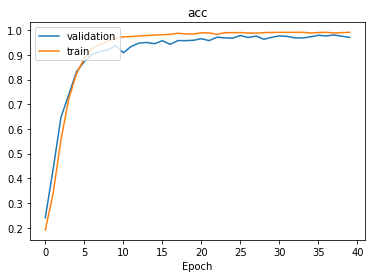

In [10]:
# print(train_model.history.keys())
name_acc = ['dig1_acc', 'dig2_acc', 'dig3_acc', 'dig4_acc', 'dig5_acc', 'dig6_acc', 'dig7_acc', 'dig8_acc', 'dig9_acc']
val_name_acc = ['val_dig1_acc', 'val_dig2_acc', 'val_dig3_acc', 'val_dig4_acc', 'val_dig5_acc', 'val_dig6_acc', 'val_dig7_acc', 'val_dig8_acc', 'val_dig9_acc']
train_acc = [0. for _ in range(len(train_model.history['dig1_acc']))]
val_acc = [0. for _ in range(len(train_model.history['dig1_acc']))]
for i in range(len(train_model.history['dig1_acc'])):
    for q in range(9):
        train_acc[i] += train_model.history[name_acc[q]][i]
        val_acc[i] += train_model.history[val_name_acc[q]][i]
for i in range(len(train_model.history['dig1_acc'])):
    train_acc[i] /= 9
    val_acc[i] /= 9
plt.plot(val_acc)
plt.plot(train_acc)
plt.title('acc')
# plt.ylabel(train)
plt.xlabel('Epoch')
plt.legend(['validation', 'train'], loc = 'upper left')
plt.show()


In [13]:
os.chdir('../predict2')

In [14]:
train = data[0][0]
train = np.reshape(train, [1,input_x,input_y,1])
probabilities = model.predict(train)
for i in range(1,10):
    print(data[i][0])
for i in range(0,9):
    print(probabilities[i])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[[2.1202439e-27 2.6249315e-20 1.7655449e-21 2.3613822e-19 4.2395869e-22
  3.7807445e-24 1.4278944e-23 2.3365238e-28 1.8713135e-22 3.2946850e-22
  1.0000000e+00]]
[[1.6281067e-25 7.8685390e-14 1.4103401e-21 6.6461981e-26 1.8513703e-20
  1.4486398e-29 4.2302988e-29 3.6879798e-18 5.7275907e-33 1.3354369e-27
  1.0000000e+00]]
[[9.7937344e-14 2.7575726e-12 9.7034479e-13 8.2250274e-08 1.4223386e-12
  9.9999642e-01 1.1342339e-06 8.6045408e-16 2.2815952e-06 3.3733812e-08
  0.0000000e+00]]
[[3.7330302e-11 1.9797028e-15 6.7006779e-13 5.5329002e-07 1.8918606e-12
  9.9776459e-01 4.6452269e-06 2.6565455e-20 2.2301662e-03 6.0362408e-13
  0.0000000e+00]]
[[9.9999487e-01 2.4400282e-07 2.52182

In [8]:
os.chdir('../predict2')

In [19]:
pre = []
for file in tqdm_notebook(listdir(os.getcwd()), desc='file', leave=True):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (input_x, input_y), interpolation=cv2.INTER_CUBIC)
    img = np.reshape(img, [1,input_x, input_y, 1])
    pre.append(img)
for i in range(len(pre)):
    prem = model.predict(pre[i])
    print(np.argmax(prem,2))


[[10]
 [10]
 [ 0]
 [ 1]
 [ 7]
 [ 4]
 [ 3]
 [ 7]
 [ 1]]
[[10]
 [10]
 [ 8]
 [ 2]
 [ 7]
 [ 1]
 [ 7]
 [ 0]
 [ 6]]
